In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from rtbm import RTBM, minimizer
from rtbm.costfunctions import logarithmic

from rtbm.layers import ThetaUnitLayer, NormAddLayer
from rtbm.model import Model

from rtbm.gradientschemes import adagrad,adam

## Generate data

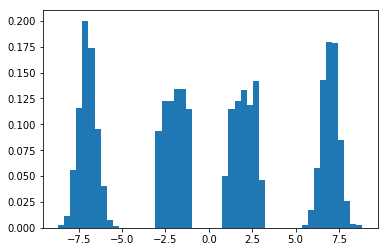

In [2]:
# likas 1d example
n = 5000

data = np.zeros(n)
u = np.random.random_sample(n)
for i in range(n):
    if u[i] < 0.25:
        data[i] = np.random.normal(-7, 0.5)
    elif u[i] < 0.50:
        data[i] = np.random.uniform(-3,-1)
    elif u[i] < 0.75:
        data[i] = np.random.uniform(1,3)
    else:
        data[i] = np.random.normal(7, 0.5)
data = data.reshape(1,n)
plt.hist(data.T, normed=True, bins=50);

## Training

In [ ]:
a = RTBM(1,2, init_max_param_bound=20)

In [ ]:
minim = minimizer.CMA(False)
solution = minim.train(logarithmic(), a, data, tolfun=1e-5)

## Testing output

In [ ]:
test_data = (np.linspace(-10,10, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True);
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')

# Testing model

In [ ]:
mdl = Model()
mdl.add(ThetaUnitLayer(1,2,Nhidden=2, init_max_param_bound=20))
mdl.add(NormAddLayer(2,1))

In [ ]:
minim = minimizer.CMA()
solution = minim.train(logarithmic(), mdl, data, maxiter=500)

In [ ]:
test_data = (np.linspace(-20,20, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True);
plt.plot(test_data.flatten(), mdl(test_data).flatten(), 'o-')

## Via grad descent

In [8]:
mdl = Model()
mdl.add(ThetaUnitLayer(1,2,Nhidden=2, init_max_param_bound=20, diagonal_T=True, check_positivity=True))
mdl.add(NormAddLayer(2,1))

In [ ]:
minim = minimizer.SGD()
solution = minim.train(logarithmic(), mdl, data, scheme=adam(), lr=0.0001, maxiter=1000)

In [ ]:
test_data = (np.linspace(-20,20, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True);
plt.plot(test_data.flatten(), mdl(test_data).flatten(), 'o-')

In [ ]:
mdl.get_parameters()

In [ ]:
mdl.gradient_check(2,test_data,0.0001)